# Lecture 2

## Outline of topics for this lecture:

1. Give a hint on the text line reverser program.
2. Assign another programming problem for inclusion in the Lab 1 writeup.
3. Finishing lecture items from previous.
4. Using Python's file input output to read a `csv` file containing average US corn yields by year.
2. Using Python's string methods to process data read in from text files, etc.

## In lab later on the assigned work is:

1. Write a simple character, word, and line count function ...
2. Figure out how to fix the plot axes in an example
3. Find data for the land values for Indiana and Alabama farmland and plot

## Some useful background material:

The <a href="https://the-examples-book.com/book/introduction" target="_blank">Purdue Data Mine Examples Book</a> contains many useful chapters on data science. While they have not been directly designed for this class, they may be useful. You will not need to use scholar to perform the exercises of this class so don't worry about that part. Here is a direct link to the <a href="https://the-examples-book.com/book/python/introduction" target="_blank">Python chapter.</a>


Additional useful links for Python include:

<a href="https://docs.python.org/3/" target="_blank">Python 3.9.4 documentation</a>

The <a href="https://pypi.org/" target="_blank">Python Package Index</a> (This contains many of the useful Python "add-on" packages such as the math package)

The <a href="https://numpy.org/" target="_blank">Numpy Package</a> (This contains specialized array (vector and matrix) routines. Numpy stands for "Numerical Python")

United States Department of Agriculture: <a href="https://quickstats.nass.usda.gov/" target="_blank">Quick Stats</a> (The USDA's National Ag Statistics Service -- go here and familiarize yourself with the available data)

In [1]:
# Import packages ...
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Hint on Line Reverser

The function is to take an input string of arbitrary length as its input and return as output the string in reverse order.

For example: 

1. If the input string is `bananas` then the output should be `sananab`.
2. If the input string is `But here's my number, so call me, maybe` then the output should be `ebyam ,em llac os ,rebmun ym s'ereh tuB`

In [ ]:
# Skeleton

def anameforyourfunction(instring):
    initialize output string
    for loop ...
    pre-pend to output string
    return the output string

# Test it on 'bananas' ...

anameforyourfunction('bananas')

# Reverse longline variable ...

backwardslongline = anameforyourfunction(longline)


In [2]:
# Here are some useful ideas ...
instring = 'But here\'s my number, so call me, maybe'; # notice the backslash!

In [3]:
instring

"But here's my number, so call me, maybe"

In [4]:
# instring is an array of characters and we can address them with the notation ...
instring[0]

'B'

In [5]:
# We can find the length of instring using the command
len(instring)

39

In [6]:
i = 0;
while i < len(instring):
    print(instring[i])
    i = i + 1;

B
u
t
 
h
e
r
e
'
s
 
m
y
 
n
u
m
b
e
r
,
 
s
o
 
c
a
l
l
 
m
e
,
 
m
a
y
b
e


In [7]:
# What if I wanted to go in reverse?

j = len(instring) - 1;
while j >= 0:
    print(instring[j])
    j = j - 1;

e
b
y
a
m
 
,
e
m
 
l
l
a
c
 
o
s
 
,
r
e
b
m
u
n
 
y
m
 
s
'
e
r
e
h
 
t
u
B


## Field Capacity Problem

The formula for field capacity is C = S*W*E/8.25 where the units of C are acres/hour and
* S = tractor speed in mph
* W = width of implement in feet
* E = efficiency of swath (a fraction between 0 and 1)

Let `E = 0.85`.

Let `S` range from 3 to 7 in 0.5 mph increments

Let `W` range from 10 to 60 in 10 foot increments

Code a capacity estimator using a nested set of `for` loops and the print command. You might want to try using `f-strings` to format a decent looking table.

## Catching up with previous lecture!

## The NumPy Package

All data manipulated by a computer is represented in binary. In otherwords, via one method or another, all data -- temperature sensor readings, hourly barometric pressure from your Davis weather station, an audio file, images from your Bushnell game camera, a yield map -- are represented as arrays of numbers.

**NumPy (Numerical Python)** provides an efficient interface to store and compute on dense data buffers. NumPy arrays are much more efficient than Python's built-in list data type.

See: <a href="http://www.numpy.org" target="_blank">The Numpy Package</a>.

In [8]:
# Import the numpy package. This command allows us to refer to numpy
# commands using the shorthand "np".
import numpy as np

## Plotting examples with Matplotlib
A better way to plot. Who says there has been no progress in the world since 1970?

In [9]:
# Import matplotlib and define a shorthand
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);
y = np.array([3, 1, 6, 5, 4, 11, -1, 1, 2, 6]);

y

array([ 3,  1,  6,  5,  4, 11, -1,  1,  2,  6])

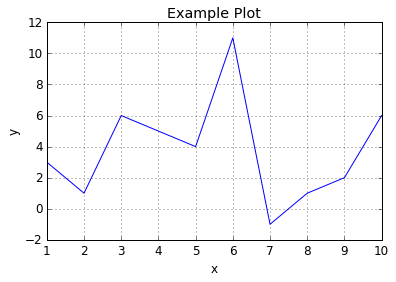

In [11]:
fig = plt.figure()
plt.style.use('classic')
plt.plot(x, y)
plt.title("Example Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

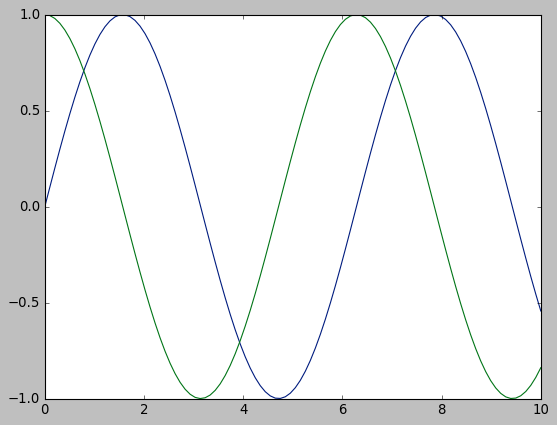

In [12]:
x = np.linspace(0, 10, 100)
fig2 = plt.figure()
plt.style.use('seaborn-dark-palette')
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))


## United states wheat yield trends as a plotting example ...

Data was obtained from the United States Department of Agriculture: <a href="https://quickstats.nass.usda.gov/" target="_blank">Quick Stats</a> (The USDA's National Ag Statistics Service -- we will make more use of this in the lab later)

In [13]:
# The years for which we have average wheat yield data.
dates = np.array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945,1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923,1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912,1911, 1910, 1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901,1900, 1899, 1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890,1889, 1888, 1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879,1878, 1877, 1876, 1875, 1874, 1873, 1872, 1871, 1870, 1869, 1868, 1867, 1866])

In [14]:
dates

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956,
       1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945,
       1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934,
       1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923,
       1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912,
       1911, 1910, 1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901,
       1900, 1899, 1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890,
       1889, 1888, 1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879,
       1878, 1877, 1876, 1875, 1874, 1873, 1872, 18

In [15]:
# The average wheat yield data in the order to line up with the corresponding years.
yields = np.array([44.5, 49.7, 51.7, 47.6, 46.4, 52.7, 43.6, 43.7, 47.1, 46.2, 43.6, 46.1, 44.3, 44.8, 40.2, 38.6, 42. , 43.2, 44.2, 35. , 40.2, 42. , 42.7, 43.2, 39.5, 36.3, 35.8, 37.6, 38.2, 39.3, 34.3, 39.5, 32.7, 34.1, 37.7, 34.4, 37.5, 38.8, 39.4, 35.5, 34.5, 33.5, 34.2, 31.4, 30.7, 30.3, 30.6, 27.3, 31.6, 32.7, 33.9, 31. , 30.6, 28.4, 25.8, 26.3, 26.5, 25.8, 25.2, 25. , 23.9, 26.1, 21.6, 27.5, 21.8, 20.2, 19.8, 18.1, 17.3, 18.4, 16. , 16.5, 14.5, 17.9, 18.2, 17.2, 17. , 17.7, 16.4, 19.5, 16.8, 15.3, 14.1, 13.3, 13.6, 12.8, 12.2, 12.1, 11.2, 13.1, 16.3, 14.2, 13. , 15.4, 14.7, 14.7, 12.8, 16. , 13.3, 13.8, 12.7, 13.5, 12.9, 14.8, 13.2, 11.9, 16.7, 16.1, 14.4, 15.1, 12.4, 13.7, 15.5, 14.3, 14.2, 16. , 15.2, 12.9, 13.7, 14.9, 15. , 12.2, 12.5, 15.2, 14. , 12.8, 13.9, 13.5, 12.4, 14.2, 16.5, 12.2, 14. , 12.1, 13.3, 14.1, 11.4, 14.8, 12.3, 15.1, 11. , 13.2, 13. , 13.5, 14.1, 10.9, 11.1, 13. , 12.9, 11.8, 12.2, 12.1, 13.7, 12.9, 12.6, 11. ])

In [16]:
yields

array([44.5, 49.7, 51.7, 47.6, 46.4, 52.7, 43.6, 43.7, 47.1, 46.2, 43.6,
       46.1, 44.3, 44.8, 40.2, 38.6, 42. , 43.2, 44.2, 35. , 40.2, 42. ,
       42.7, 43.2, 39.5, 36.3, 35.8, 37.6, 38.2, 39.3, 34.3, 39.5, 32.7,
       34.1, 37.7, 34.4, 37.5, 38.8, 39.4, 35.5, 34.5, 33.5, 34.2, 31.4,
       30.7, 30.3, 30.6, 27.3, 31.6, 32.7, 33.9, 31. , 30.6, 28.4, 25.8,
       26.3, 26.5, 25.8, 25.2, 25. , 23.9, 26.1, 21.6, 27.5, 21.8, 20.2,
       19.8, 18.1, 17.3, 18.4, 16. , 16.5, 14.5, 17.9, 18.2, 17.2, 17. ,
       17.7, 16.4, 19.5, 16.8, 15.3, 14.1, 13.3, 13.6, 12.8, 12.2, 12.1,
       11.2, 13.1, 16.3, 14.2, 13. , 15.4, 14.7, 14.7, 12.8, 16. , 13.3,
       13.8, 12.7, 13.5, 12.9, 14.8, 13.2, 11.9, 16.7, 16.1, 14.4, 15.1,
       12.4, 13.7, 15.5, 14.3, 14.2, 16. , 15.2, 12.9, 13.7, 14.9, 15. ,
       12.2, 12.5, 15.2, 14. , 12.8, 13.9, 13.5, 12.4, 14.2, 16.5, 12.2,
       14. , 12.1, 13.3, 14.1, 11.4, 14.8, 12.3, 15.1, 11. , 13.2, 13. ,
       13.5, 14.1, 10.9, 11.1, 13. , 12.9, 11.8, 12

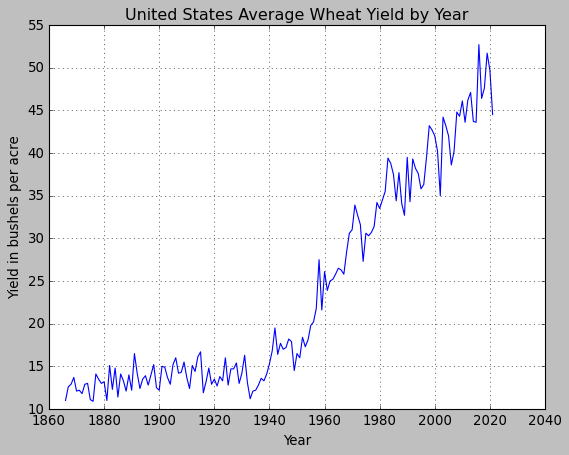

In [17]:
# Plotting the wheat yield trend
fig = plt.figure()
plt.style.use('classic')
plt.plot(dates, yields)
plt.title("United States Average Wheat Yield by Year")
plt.xlabel("Year")
plt.ylabel("Yield in bushels per acre")
plt.grid()

## United states corn yield trends as a plotting example ...

Data was obtained from the United States Department of Agriculture: <a href="https://quickstats.nass.usda.gov/" target="_blank">Quick Stats</a> (The USDA's National Ag Statistics Service -- we will make more use of this in the lab later)

The choices made on the Quick Stats page are shown below ...

<img align="left" src='Figs/USDA-NASS-screen-shot.png' width="700"/>

### A file is found in the `Data` subdirectory which was obtained by ...

1. Pressing the `Get Data` button on NASS webpage
2. Saving it as a `csv` file
3. Opening the `csv` file with Microsoft Excel to delete superfluous columns and saving the file as `US-National-CornYields.csv`

Our **goal** now is to read this file and use the data to make a plot of average corn yield vs. year.

To that end let's read in the corn yields data file, print the first few lines, and examine the data, etc.

In [18]:
# Put the file name into a str variable for convenience
file_name = 'Data/US-National-CornYields.csv'

# Open the file for reading only and print the first few 
# lines.

fin = open(file_name, "r")

for i in range(20):
    line = fin.readline()
    print(line, end='')

fin.close()

Year,Value
2021,176.3
2020,172
2019,167.5
2018,176.4
2017,176.6
2016,174.6
2015,168.4
2014,171
2013,158.1
2012,123.1
2011,146.8
2010,152.6
2009,164.4
2008,153.3
2007,150.7
2006,149.1
2005,147.9
2004,160.3
2003,142.2


### What is here ... ?

The first line of the file contains the header information. Now that we know it, we are not in much need of it. 

The variable `line` in the cell above has taken in turn the first 20 lines of the file `'Data/US-National-CornYields.csv'`. When the loop ends at the 20th step the variable `line` should still contain the last line read. Let's take a closer look at it.

In [19]:
print(line)
print(type(line))

2003,142.2

<class 'str'>


In [20]:
# What is really in the line variable?

line

'2003,142.2\n'

### Clearly the lines are just text strings ...

The data fields are separated by a comma, the first field containing the year, and the second containing the U.S. average corn yield for that year. 

The line ends with a `\n` new line character

### Python provides a number of ***methods*** for operating on strings ...

Methods are often written with dot notation wherein a string or string variable is followed by dot the method name and some optional paramters. Let `my_string` be a variable that holds a string. Some important methods are

* `my_string.find('xyz')` -- returns the index of the position in the original string where the first occurance of `'xyz'` is found, or -1 if never found

* `my_string.upper()` -- makes a new string which is the upper case version of the original. There is also a `.lower()`

* `my_string.replace('old','new')` -- replaces first occurance of substring `'old'` with substring `'new'`

* `my_string.split()` -- with no arguments it splits an input string at white space characters, e.g., space, tab, new line and produces a list containing the substrings.

There are many other string methods.

### Some example string operations ...

In [21]:
# The split method applies to the processing of text strings. Remember
# that a text string is a sequence of characters, sometimes called an array
# of characters.

# An example text string is one of the lines from the Limerick poem of the
# previous lab ...

ExampleString = 'There once was a fly on the wall'

In [22]:
# Check the type

type(ExampleString)

str

In [23]:
# How long is it?

len(ExampleString)

32

In [24]:
# What is the first element?

ExampleString[0]

'T'

In [25]:
# What is the last element?

ExampleString[31]

'l'

In [26]:
# Note that we don't have to define the variable in order to refer
# to the individual elements in this way ...

'There once was a fly on the wall'[5]

' '

The split method applies to a text string, splitting it into smaller strings demarcated by some marker, which can be specified. It puts the results into a list of smaller text strings. For example ...

`'There once was a fly on the wall'`

In [27]:
# If we split on a single space character ...

'There once was a   fly on the wall'.split(' ')

['There', 'once', 'was', 'a', '', '', 'fly', 'on', 'the', 'wall']

In [28]:
# If we split on any white space ... this doesn't count extra spaces ...
# White space refers to tabs and space characters. On a printed page of white paper
# there is therefore nothing there. White space might also include new lines ...

'There once was a   fly on the \t wall'.split()

['There', 'once', 'was', 'a', 'fly', 'on', 'the', 'wall']

In [29]:
len('There once was a   fly on the wall'.split())

8

### Back to the problem at hand -- reading and processing the corn yield data

In [30]:
# Remember the variable line which was set at the 20th line of the file

line

'2003,142.2\n'

In [31]:
# Remove the newline character, which was found at the end of each line in the
# yield data file

line.replace('\n','')

'2003,142.2'

In [32]:
# Split the remaining line on the comma. Note that we can cascade these
# string methods ...

line.replace('\n','').split(',')

['2003', '142.2']

In [33]:
# The elements in the list above are still text strings, which cannot be plotted
# until they are converted to numbers (either floats or ints)

templist = line.replace('\n','').split(',')
d = int(templist[0])
y = float(templist[1])
print(type(d))
print(type(y))

<class 'int'>
<class 'float'>


In [34]:
d

2003

In [35]:
y

142.2

In [36]:
# Read the whole file using a for loop and create the data to be plotted

fin = open(file_name, "r")
fin.readline() #Read first line to move past header
d = np.array([])
y = np.array([])

for line in fin:
    templist = line.replace('\n','').split(',')
    d = np.append(d, float(templist[0]))
    y = np.append(y, float(templist[1]))

fin.close()

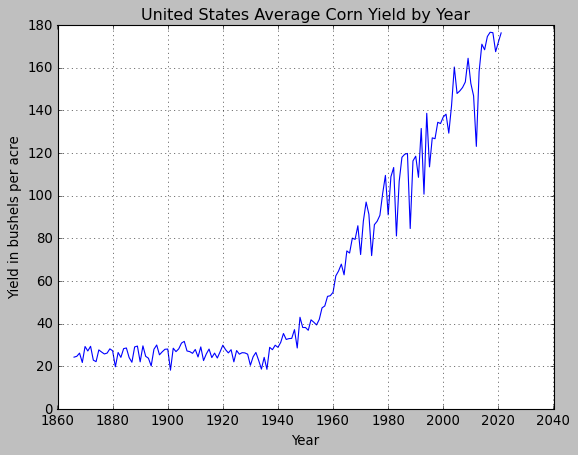

In [37]:
# Plotting the corn yield trend
fig = plt.figure()
plt.style.use('classic')
plt.plot(d, y)
plt.title("United States Average Corn Yield by Year")
plt.xlabel("Year")
plt.ylabel("Yield in bushels per acre")
plt.grid()

### That's a similar looking trend to the wheat yield data we saw in a previous lecture ...

Might be interesting to compare them. Copying some cells from Lecture 1.

In [38]:
wdates = np.array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945,1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923,1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912,1911, 1910, 1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901,1900, 1899, 1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890,1889, 1888, 1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879,1878, 1877, 1876, 1875, 1874, 1873, 1872, 1871, 1870, 1869, 1868, 1867, 1866])
wyields = np.array([44.5, 49.7, 51.7, 47.6, 46.4, 52.7, 43.6, 43.7, 47.1, 46.2, 43.6, 46.1, 44.3, 44.8, 40.2, 38.6, 42. , 43.2, 44.2, 35. , 40.2, 42. , 42.7, 43.2, 39.5, 36.3, 35.8, 37.6, 38.2, 39.3, 34.3, 39.5, 32.7, 34.1, 37.7, 34.4, 37.5, 38.8, 39.4, 35.5, 34.5, 33.5, 34.2, 31.4, 30.7, 30.3, 30.6, 27.3, 31.6, 32.7, 33.9, 31. , 30.6, 28.4, 25.8, 26.3, 26.5, 25.8, 25.2, 25. , 23.9, 26.1, 21.6, 27.5, 21.8, 20.2, 19.8, 18.1, 17.3, 18.4, 16. , 16.5, 14.5, 17.9, 18.2, 17.2, 17. , 17.7, 16.4, 19.5, 16.8, 15.3, 14.1, 13.3, 13.6, 12.8, 12.2, 12.1, 11.2, 13.1, 16.3, 14.2, 13. , 15.4, 14.7, 14.7, 12.8, 16. , 13.3, 13.8, 12.7, 13.5, 12.9, 14.8, 13.2, 11.9, 16.7, 16.1, 14.4, 15.1, 12.4, 13.7, 15.5, 14.3, 14.2, 16. , 15.2, 12.9, 13.7, 14.9, 15. , 12.2, 12.5, 15.2, 14. , 12.8, 13.9, 13.5, 12.4, 14.2, 16.5, 12.2, 14. , 12.1, 13.3, 14.1, 11.4, 14.8, 12.3, 15.1, 11. , 13.2, 13. , 13.5, 14.1, 10.9, 11.1, 13. , 12.9, 11.8, 12.2, 12.1, 13.7, 12.9, 12.6, 11. ])

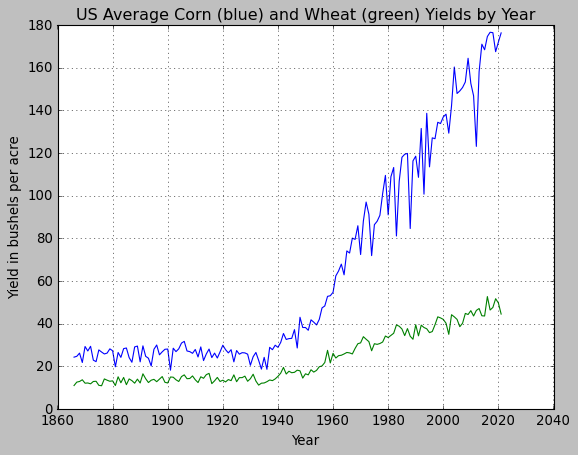

In [39]:
# Plotting the wheat and corn yield trend on the same axes
fig = plt.figure()
plt.style.use('classic')
plt.plot(d, y)
plt.title("US Average Corn (blue) and Wheat (green) Yields by Year")
plt.xlabel("Year")
plt.ylabel("Yield in bushels per acre")
plt.grid()
plt.plot(wdates, wyields)

### Let's look at a more complicated scenario ...

The choices on the USDA NASS webpage that result in the `csv` below are:

<img align="left" src='Figs/USDA-NASS-screen-shot--landvalues.png' width="700"/>

In [40]:
# Put the file name into a str variable for convenience
file_name = 'Data/US-LandValue-by-State-and-Year.csv'

# Open the file for reading only and print the first few 
# lines.

fin = open(file_name, "r")

for i in range(20):
    line = fin.readline()
    print(line, end='')

fin.close()

"Program","Year","Period","Week Ending","Geo Level","State","State ANSI","Ag District","Ag District Code","County","County ANSI","Zip Code","Region","watershed_code","Watershed","Commodity","Data Item","Domain","Domain Category","Value","CV (%)"
"SURVEY","2021","YEAR","","STATE","ARKANSAS","05","","","","","","","00000000","","AG LAND","AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / ACRE","TOTAL","NOT SPECIFIED","2,130",""
"SURVEY","2021","YEAR","","STATE","CALIFORNIA","06","","","","","","","00000000","","AG LAND","AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / ACRE","TOTAL","NOT SPECIFIED","5,900",""
"SURVEY","2021","YEAR","","STATE","COLORADO","08","","","","","","","00000000","","AG LAND","AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / ACRE","TOTAL","NOT SPECIFIED","1,400",""
"SURVEY","2021","YEAR","","STATE","FLORIDA","12","","","","","","","00000000","","AG LAND","AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / AC

### The situation here is clearly more complicated than what we've before seen ...

Let's look at the header and a representative data line separately

In [41]:
fin = open(file_name, "r")

headerline = fin.readline()
dataline = fin.readline()

fin.close()

In [42]:
headerline

'"Program","Year","Period","Week Ending","Geo Level","State","State ANSI","Ag District","Ag District Code","County","County ANSI","Zip Code","Region","watershed_code","Watershed","Commodity","Data Item","Domain","Domain Category","Value","CV (%)"\n'

In [43]:
dataline

'"SURVEY","2021","YEAR","","STATE","ARKANSAS","05","","","","","","","00000000","","AG LAND","AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / ACRE","TOTAL","NOT SPECIFIED","2,130",""\n'

### Looking at these we see ...

* There are many columns that are superfluous for our application. We want to look at the trends over time of the values of ag land and attempt to correlate with corn productivity.

* To this end the columns of interest are `Year`, `State`, and `Value` since we already know the context

* We also note that comma can appear in the data both in the text string under the "Data Item" column and in the "Value" column. So we don't want to simply split on comma as it will create false columns. One thing we could do is to split on `","` and use the fact that they've put these superfluous double quotes on the lines.

Let's try it with `dataline` ...

In [44]:
# Experimenting with split method for finding the data we want ...

dataline.split('","')

['"SURVEY',
 '2021',
 'YEAR',
 '',
 'STATE',
 'ARKANSAS',
 '05',
 '',
 '',
 '',
 '',
 '',
 '',
 '00000000',
 '',
 'AG LAND',
 'AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / ACRE',
 'TOTAL',
 'NOT SPECIFIED',
 '2,130',
 '"\n']

In [45]:
# The year field is in positon 1 of the list ...

dataline.split('","')[1]

'2021'

In [46]:
# The state field is in positon 5 of the list ...

dataline.split('","')[5]

'ARKANSAS'

In [47]:
# The value field is in positon 19 of the list ...

dataline.split('","')[19]

'2,130'

In [48]:
# Can we convert this number to a float?

float(dataline.split('","')[19])

ValueError: could not convert string to float: '2,130'

In [49]:
# We can but the float() function does not like the comma in the string. So we first
# remove it and then call float ...

dataline.split('","')[19].replace(',','')

'2130'

In [50]:
# Now call float() and it works!!

float(dataline.split('","')[19].replace(',',''))

2130.0

In [51]:
# Let's pull land values data out for some states of interest ... COLORADO, ARKANSAS, KANSAS

In [52]:
# Put the file name into a str variable for convenience
file_name = 'Data/US-LandValue-by-State-and-Year.csv'

# Open the file for reading only and print the first few 
# lines.

fin = open(file_name, "r")
fin.readline() #Read first line to move past header

d_ark = np.array([])
v_ark = np.array([])
d_col = np.array([])
v_col = np.array([])
d_kan = np.array([])
v_kan = np.array([])

for line in fin:
    templist = line.split('","')
    state = templist[5]
    if state == 'ARKANSAS':
        d_ark = np.append(d_ark, float(templist[1]))
        v_ark = np.append(v_ark, float(templist[19].replace(',','')))
    elif state == 'COLORADO':
        d_col = np.append(d_col, float(templist[1]))
        v_col = np.append(v_col, float(templist[19].replace(',','')))
    elif state == 'KANSAS':
        d_kan = np.append(d_kan, float(templist[1]))
        v_kan = np.append(v_kan, float(templist[19].replace(',','')))
        
fin.close()

In [53]:
d_ark

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2010., 2009., 2008., 2007., 2006., 2005., 2004.,
       2003., 2002., 2001., 2000., 1999., 1998., 1997.])

In [54]:
v_kan

array([2250., 1970., 2050., 1960., 1910., 1970., 2110., 2160., 1840.,
       1590., 1290., 1060.,  981.,  980.,  880.,  820.,  770.,  650.,
        645.,  640.,  635.,  630.,  625.,  620.,  615.])

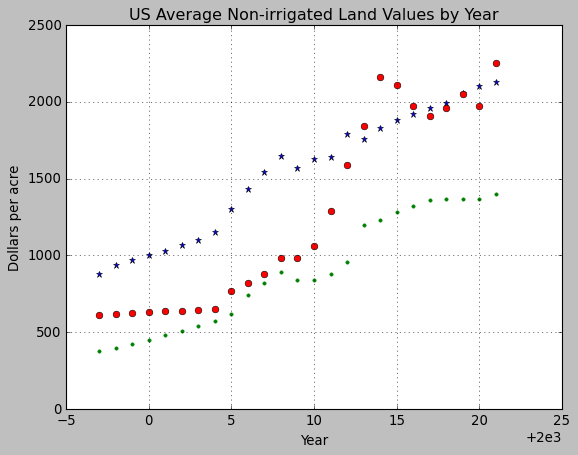

In [55]:
# Plotting the land value trends on the same axes
fig = plt.figure()
plt.style.use('classic')
plt.plot(d_ark, v_ark, '*')
plt.title("US Average Non-irrigated Land Values by Year")
plt.xlabel("Year")
plt.ylabel("Dollars per acre")
plt.grid()
plt.plot(d_col, v_col, '.')
plt.plot(d_kan, v_kan, 'o')

### Some homework ...

The x-axis in the plot above if very annoying. How can we fix this to simply show the years directly?

Why is there no data in the `csv` file for land values for Indiana and Alabama? Can we go back to NASS and find it?